# Introduction

  The aim of this assignment is to implement, test and experiment the various linear regression models on a dataset and make inferences and deductions based on the results of the observation providing a meaningful insight for the dataset. This is accomplished by running the different algorithms of LMS and LS, we can figure out which model produces the better result and best fits the given dataset.   

# Data

### Description

The dataset used for this part of the assignemt consists of the various features and factors that determine the potential of a soccer player on a scale of 0-100 (100 being maximum). The dataset has records of total 17981 players and 37 features that constitute in predicting the potential such as acceleration, stamina, dribbling, shooting, vision, strength, marking, interception, reflex, handling and so on. All the features are scaled from 0-100 (100 being maximum). Kaggle was the souce of the dataset and the link is given below.
    
Source : #https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset/discussion/40192

   The dataset was in a crude form on initial download. There were lots of missing values and inavlid characters used for naming. The missing charaters where all replaced with mean of the overall rating of the column while the special characters where all removed. The records were all unindexed, so the records were sorted in descending order and indexed from 1 to 17981. There were some datatypes mismatches which were also resolved during the preprocessing phase and a final pure dataset is provided in CSV format.

In [1]:
#Reading the data
#importing the necessary directives
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

#reading the data - replace the path if necessary
df = pd.read_csv("F:\players_position_dataset_new.csv",  encoding = "ISO-8859-1")

### Plots

In [2]:
potential = df.loc[df.loc[:, 'Potential'] > 0, ['Age', 'Overall', 'Potential']]

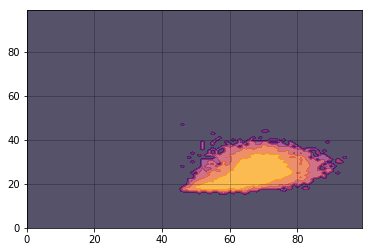

In [3]:
fig = plt.figure()

xs, ys = np.meshgrid(np.arange(100), np.arange(100)) 

zs = np.zeros(xs.shape)
counter = 0;
for i, row  in potential.iterrows():
    x, y = int(row['Age']), int(row['Overall'])
    zs[x, y] += row['Potential']

plt.contourf(xs, ys, np.log(zs + 1), alpha=0.7, cmap=plt.cm.inferno)
plt.grid(c='k', ls='-', alpha=0.3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001519C072D68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001519CA4BB70>]], dtype=object)

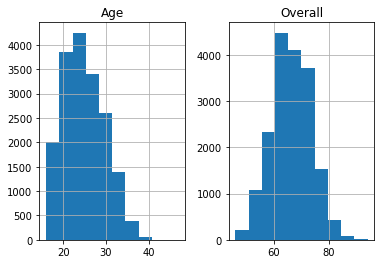

In [4]:
potential.loc[:, ['Age', 'Overall']].hist()

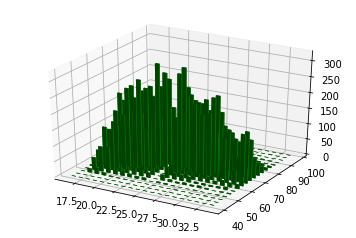

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(potential.loc[:, 'Age'], potential.loc[:, 'Overall'], bins=20, range=[[16, 34], [40, 100]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='green', zsort='average')

plt.show()

Initially compare the independent factors of age and overall against the target potential. From the Plot 1 and Plot 2, we can hypotheise that the younger players tend to have higher potential with varying dependency on their overall.

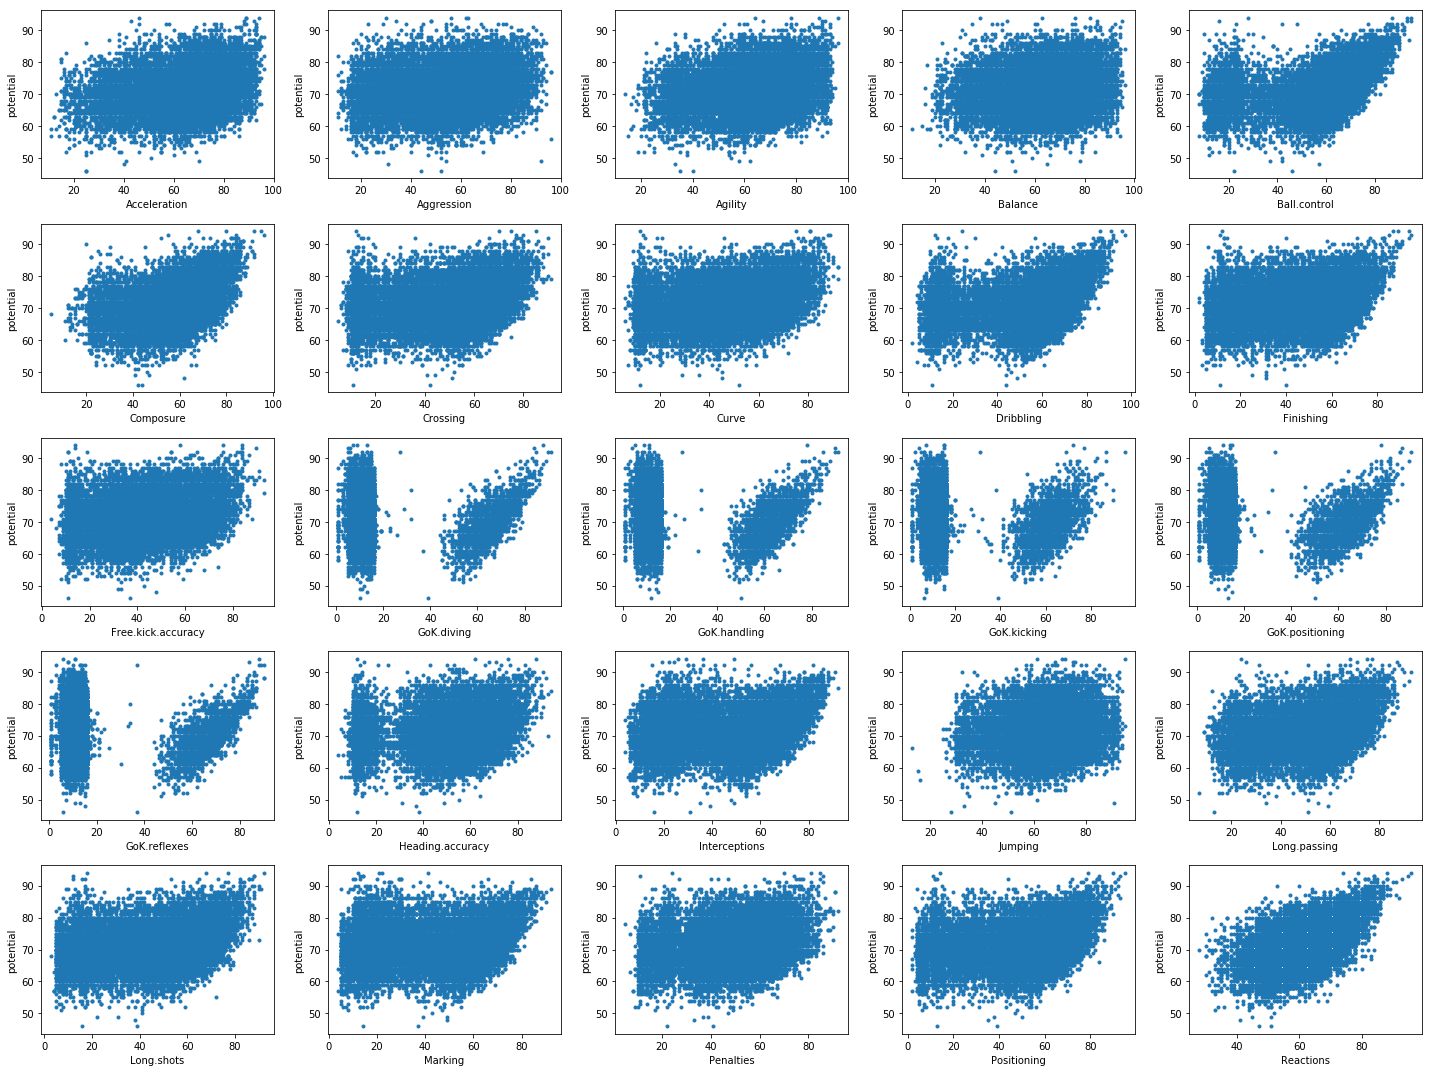

In [6]:
attribs = df.iloc[:, 4:-1].copy()
outPotential = df.loc[:, 'Potential']
figureToShow = plt.figure(figsize=(20,15))
plt.clf()
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.plot(attribs.iloc[:, i], outPotential,'.')
    plt.xlabel(attribs.columns.values[i])
    plt.ylabel('potential')
figureToShow.tight_layout()

Here we inspect the effect of the different attributes on the potential of the player. Factors like Finishing, Reactions, Positioning, Ball Control, Dribbling all tend have a significant effect on determing the potential of a player.

### Priliminary Observations

In [7]:
X = df.iloc[:, :-1]
T = df.iloc[:, -1].as_matrix()
N = df.shape[0]

In [8]:
Tlog = np.log(T + 1)

In [9]:
X1 = np.hstack((np.ones((N,1)), X))
X1

array([[  1.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          8.00000000e+01,   8.50000000e+01,   8.80000000e+01],
       [  1.00000000e+00,   2.00000000e+00,   1.00000000e+00, ...,
          5.90000000e+01,   9.00000000e+01,   8.50000000e+01],
       [  1.00000000e+00,   3.00000000e+00,   2.00000000e+00, ...,
          5.30000000e+01,   8.00000000e+01,   8.30000000e+01],
       ..., 
       [  1.00000000e+00,   1.79790000e+04,   1.79780000e+04, ...,
          3.20000000e+01,   3.70000000e+01,   3.30000000e+01],
       [  1.00000000e+00,   1.79800000e+04,   1.79790000e+04, ...,
          4.60000000e+01,   5.10000000e+01,   2.50000000e+01],
       [  1.00000000e+00,   1.79810000e+04,   1.79800000e+04, ...,
          6.70000000e+01,   2.20000000e+01,   1.90000000e+01]])

In [10]:
w = np.linalg.lstsq(X1.T @ X1, X1.T @ Tlog)[0]

In [11]:
w

array([  3.88493420e+00,   4.88124973e-05,  -5.02213497e-05,
        -1.26023239e-02,   1.14422507e-02,  -2.21109840e-04,
         7.15717078e-06,  -7.48274919e-05,   1.66897760e-04,
         1.52570960e-04,   2.99172099e-04,  -2.69600946e-04,
         5.19265144e-05,   1.65451095e-04,  -7.33798125e-05,
        -5.75014578e-05,   1.62191366e-05,   2.69069487e-05,
        -2.34994157e-04,   2.21019996e-04,  -1.05287821e-04,
        -3.51229656e-05,   2.05052041e-06,   3.12603503e-05,
        -3.95254744e-06,  -8.65437409e-05,  -1.27572926e-04,
         2.49332778e-04,  -6.01202711e-05,  -1.37226911e-04,
        -3.66787618e-05,  -1.54412228e-05,   2.82742516e-04,
        -9.77722436e-05,  -5.10486888e-04,  -3.36942896e-05,
        -1.79307848e-04,   1.17477132e-04,  -5.28737401e-05])

In [12]:
Y = X1 @ w

In [13]:
# RMSE 

E = Tlog-Y
E

array([ 0.05819808,  0.01155427, -0.02847502, ..., -0.02874592,
        0.03618256,  0.05152886])

In [14]:
(Tlog - Y)**2

array([ 0.00338702,  0.0001335 ,  0.00081083, ...,  0.00082633,
        0.00130918,  0.00265522])

In [15]:
np.mean((Tlog - Y)**2)

0.0011814867476285275

In [16]:
np.sqrt(np.mean((Tlog - Y)**2))

0.034372761710815838

In [17]:
pd.DataFrame(T).describe()

,0
count,17981.000000
mean,71.190813
std,6.102199
min,46.000000
25%,67.000000
50%,71.000000
75%,75.000000
max,94.000000


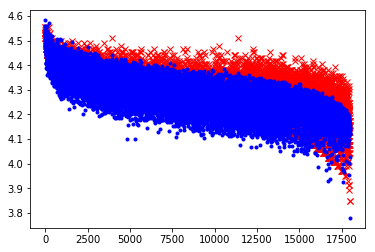

In [18]:
plt.plot(Tlog, 'xr')
plt.plot(Y, '.b')

This plot further provides evidence to our initial hypothesis, that the younger the age of the player, the more the potential of the player tends to be.

# Method

In [19]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

In [20]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        
        X1 = self.add_ones(X)
        self.w = np.linalg.inv(X1.T @ X1) @ X1.T @ T 
        
    
    # apply the learned model to data X
    def use(self, X):
        X1 = self.add_ones(X)
        return X1 @ self.w

In [21]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        N = X.shape[0]
        X1 = self.add_ones(X)
        if(self.w is None):
            self.w = np.zeros(X1.shape[1])
        for x,t in zip(X, T):
            self.train_step(x, t)
        pass  
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x1 = np.concatenate([[1],x])
        if(self.w is None):
            self.w = np.zeros(x1.shape[0])
        y = self.w @ x1
        self.w -= self.alpha * (y - t) * x1
        
        pass  
    
    # apply the current model to data X
    def use(self, X):
        X1 = self.add_ones(X)
        tmpY = X1 @ self.w
        return tmpY.reshape(-1,1)         

# Experiments

In [22]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )

training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


### AGE VS POTENTIAL

798.512955688


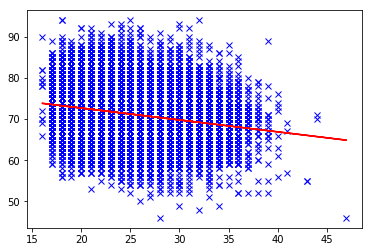

In [28]:
potential = df[['Potential']].values

age = df[['Age']].values

ls = LinearRegress()

ls.train(age, potential)

yout = ls.use(age)

errorIn = rmse(potential, yout)
print(errorIn)

plt.plot(age,potential,"bx")
plt.plot(age,yout,'r')

As the regression line estimates here, as the age increases the potential of a player tends to drop drastically. Comparing LS and LMS, LS tends to produce better results.

2333.80812172


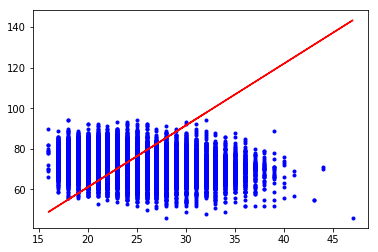

In [29]:
plt.clf()
theLMS = LMS(0.000002)
theLMS.train(age, potential)
yOutput = theLMS.use(age)

errorIn = rmse(potential, yOutput)
print(errorIn)

plt.plot(age, potential, 'b.')
plt.plot(age, yOutput, 'r')

### FINISHING VS POTENTIAL

794.023749821


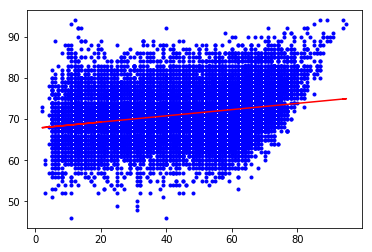

In [38]:
opotential = df[['Potential']].values
overall = df[['Finishing']].values


tLS = LinearRegress()

tLS.train(overall, opotential)

yOutput = tLS.use(overall)

errorIn = rmse(opotential, yOutput)
print(errorIn)

plt.plot(overall, opotential, 'b.')
plt.plot(overall, yOutput, 'r')

4258.59800866


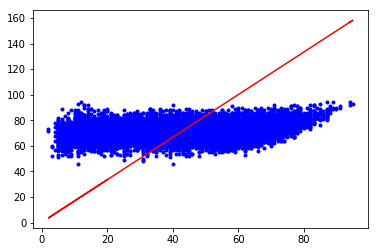

In [37]:
plt.clf()
theLMS = LMS(0.000002)
theLMS.train(overall, outputCount)
yOutput = theLMS.use(overall)
He
errorIn = rmse(outputCount, yOutput)
print(errorIn)

plt.plot(overall, outputCount, 'b.')
plt.plot(overall, yOutput, 'r')

From the plot it is evident that the player with higher ability to finish chances have tending have better potential. In this case, LMS produces better results than LS.

# Conclusion

Thus throught his assignment, I have got a thorough knowledge of how and when to use which model for which data. I can build on this as platform and learn lot in the upcoming assignments about the various ML algorithms and techniques.

# References

1. https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
2.https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9